In [15]:
import json
import networkx as nx
from pyvis.network import Network
import re

## Convert PyCG `.json` to a NetworkX directed graph

In [3]:
# Helper functions
def assign_group(name:str) -> str:
    """To colour graph nodes according to class"""
    if re.match("^\\<builtin\\>", name):
        return "built-in"
    elif re.match("core.alignment.AlignmentArray"):
        return "AlignmentArray"
    elif re.match("core.alignment.AlignmentI"):
        return "AlignmentI"
    elif re.match("core.alignment.Alignment"):
        return "Alignment"
    elif re.match("core.alignment.Aligned"):
        return "Aligned"
    elif re.match("core.alignment._SequenceCollectionBase"):
        return "_SequenceCollectionBase"
    elif re.match("core.alignment.SequenceCollection"):
        return "_SequenceCollectionBase"
    elif re.match("cogent3"):
        return "Other cogent3"
    else:
        return "Other package"


In [17]:
# Load json as dict
with open("alignment_stripped.json","r") as file:
    pycg_dict = json.load(file)

# Convert dict to NetworkX
G = nx.DiGraph()
for node, children in pycg_dict.items():
    #print(f"Node: {node}\nChildren: {children}\n")
    for child in children:
        G.add_edge(node, child, size=50)

Node: cogent3.core.alignment
Children: ['cogent3.util.warning.deprecated_args', 'functools.singledispatch']

Node: cogent3.core.alignment.AllowedCharacters
Children: ['<builtin>.set']

Node: <builtin>.set
Children: []

Node: cogent3.core.alignment.AllowedCharacters.just_chars
Children: ['<builtin>.set', '<builtin>.str']

Node: <builtin>.str
Children: []

Node: cogent3.core.alignment.AllowedCharacters.not_chars
Children: ['<builtin>.set']

Node: cogent3.core.alignment.GapsOk.__init__
Children: ['<builtin>.set']

Node: cogent3.core.alignment.GapsOk._get_gap_frac
Children: ['<builtin>.len', 'collections.Counter.flatten', 'collections.Counter', '<builtin>.sum', '<builtin>.str']

Node: <builtin>.len
Children: []

Node: collections.Counter.flatten
Children: []

Node: collections.Counter
Children: []

Node: <builtin>.sum
Children: []

Node: cogent3.core.alignment.GapsOk.gap_frac_ok
Children: ['cogent3.core.alignment.GapsOk._get_gap_frac']

Node: cogent3.core.alignment.GapsOk.gap_frac_not_ok
C

In [18]:
# See all objects to decide how to assign (colour) nodes
unique_items = set(pycg_dict.keys())
for val in pycg_dict.values():
    if isinstance(val, list):
        for v in val:
            unique_items.add(v)
    else:
        unique_items.add(val)

In [25]:
sorted(unique_items)

['<builtin>.ArithmeticError',
 '<builtin>.IOError',
 '<builtin>.NotImplementedError',
 '<builtin>.RuntimeError',
 '<builtin>.TypeError',
 '<builtin>.ValueError',
 '<builtin>.any',
 '<builtin>.dict',
 '<builtin>.enumerate',
 '<builtin>.float',
 '<builtin>.getattr',
 '<builtin>.hasattr',
 '<builtin>.hash',
 '<builtin>.int',
 '<builtin>.isinstance',
 '<builtin>.iter',
 '<builtin>.len',
 '<builtin>.list',
 '<builtin>.locals',
 '<builtin>.map',
 '<builtin>.max',
 '<builtin>.min',
 '<builtin>.property',
 '<builtin>.range',
 '<builtin>.reversed',
 '<builtin>.set',
 '<builtin>.sorted',
 '<builtin>.str',
 '<builtin>.sum',
 '<builtin>.super',
 '<builtin>.tuple',
 '<builtin>.type',
 '<builtin>.zip',
 'cogent3.app.dist.get_approx_dist_calc',
 'cogent3.core.alignment',
 'cogent3.core.alignment.Aligned',
 'cogent3.core.alignment.Aligned.__add__',
 'cogent3.core.alignment.Aligned.__eq__',
 'cogent3.core.alignment.Aligned.__getitem__',
 'cogent3.core.alignment.Aligned.__hash__',
 'cogent3.core.alignme

cogent3.core.alignment
cogent3.core.alignment.AllowedCharacters
<builtin>.set
cogent3.core.alignment.AllowedCharacters.just_chars
<builtin>.str
cogent3.core.alignment.AllowedCharacters.not_chars
cogent3.core.alignment.GapsOk.__init__
cogent3.core.alignment.GapsOk._get_gap_frac
<builtin>.len
collections.Counter.flatten
collections.Counter
<builtin>.sum
cogent3.core.alignment.GapsOk.gap_frac_ok
cogent3.core.alignment.GapsOk.gap_frac_not_ok
cogent3.core.alignment.GapsOk.gap_run_ok
cogent3.core.alignment.GapsOk.__call__
cogent3.core.alignment.assign_sequential_names
<builtin>.range
cogent3.core.alignment.coerce_to_string
<builtin>.isinstance
<builtin>.map
cogent3.util.warning.deprecated_args
cogent3.core.alignment.seqs_from_array
numpy.transpose
<builtin>.list
cogent3.core.alignment.seqs_from_array_seqs
cogent3.core.alignment.seqs_from_generic
<builtin>.hasattr
cogent3.core.alignment.seqs_from_fasta
cogent3.parse.fasta.MinimalFastaParser
<builtin>.zip
cogent3.core.alignment.seqs_from_dict


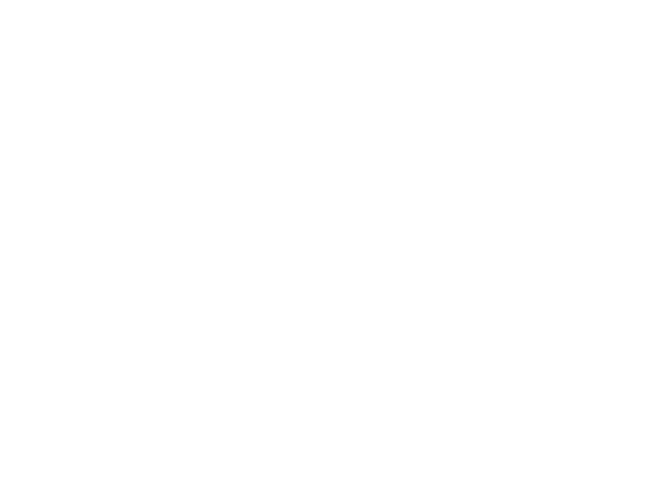

In [23]:
# Alternatively, add nodes first with properies
G2 = nx.DiGraph()
for node in pycg_dict.keys():

    #node = strip_leading_fs(node)
    #print(node)

nx.draw(G2)

In [11]:
print(G)

DiGraph with 1030 nodes and 1418 edges


## Convert NetworkX

In [54]:
# Create Network instance
pyvis_graph = Network(notebook=True, cdn_resources="remote")
pyvis_graph.from_nx(G)
pyvis_graph.show("pyvis_graph.html")

pyvis_graph.html
